# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here

In [3]:
import numpy as np
import pandas as pd

In [4]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [5]:
df_titanic.head(n=5)

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [6]:
df_titanic['class'].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [7]:
df_titanic[(df_titanic['class'] == '3rd') | (df_titanic['class'] == '2nd') | (df_titanic['class'] == '1st')]

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [8]:
# Code here
joint_dis=pd.crosstab(df_titanic["class"], df_titanic["embarked"])

In [9]:
joint_dis

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494
deck crew,23,0,0,43
engineering crew,43,0,0,281
restaurant staff,0,0,0,69
victualling crew,122,0,0,309


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [15]:
# Code here
crosstab = pd.crosstab(df_titanic['class'], df_titanic['embarked'])

conDiv = crosstab.div(crosstab.sum(axis=1), axis=0)  # Conditional distribution of class given embarked
conDiv


embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756
deck crew,0.348485,0.000000,0.000000,0.651515
engineering crew,0.132716,0.000000,0.000000,0.867284
restaurant staff,0.000000,0.000000,0.000000,1.000000
victualling crew,0.283063,0.000000,0.000000,0.716937


In [14]:
crosstab = pd.crosstab(df_titanic['embarked'], df_titanic['class'])

conDiv = crosstab.div(crosstab.sum(axis=1), axis=0)  # Conditional distribution of class given embarked
conDiv


class,1st,2nd,3rd,deck crew,engineering crew,restaurant staff,victualling crew
embarked,,,,,,,
B,0.015228,0.030457,0.000000,0.116751,0.218274,0.000000,0.619289
C,0.527675,0.095941,0.376384,0.000000,0.000000,0.000000,0.000000
Q,0.024390,0.056911,0.918699,0.000000,0.000000,0.000000,0.000000
S,0.108292,0.151609,0.305693,0.026609,0.173886,0.042698,0.191213


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [23]:
df_filtered = df_titanic[df_titanic['class'].isin(['1st', '2nd', '3rd'])]

grouped_filtered = df_filtered.groupby(['embarked', 'class']).size().unstack()


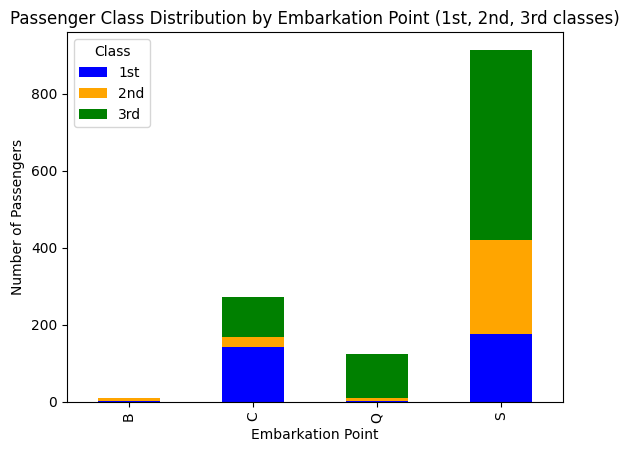

In [24]:
grouped_filtered.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Passenger Class Distribution by Embarkation Point (1st, 2nd, 3rd classes)')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.legend(title='Class')
plt.show()


## Pros:

Easier to compare and also deeply analyze the proportion of every class

## Cons:

Getting the exact number through this stacked bar can be tough to get as it is not as explicit as in the distribution table